In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install sentence_transformers
!pip install scikit-plot

In [ ]:
import numpy as np
import pandas as pd
import sentence_transformers
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.svm import SVC

In [ ]:
random_state = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
project_path =  '/content/drive/My Drive/Colab/'


name of the dataset here

In [ ]:
df = pd.read_csv(project_path +'electionfinal.csv')

In [ ]:
df['class'].value_counts()

n     23229
bp    19420
cp     7669
bn     5838
cn     3763
Name: class, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
random_state = 42

In [ ]:
#df = df.sample(n=100, random_state=random_state,replace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df = shuffle(df).reset_index(drop=True)

In [ ]:
split = int(df.shape[0] * 0.8)

In [ ]:
df_train = df.iloc[:split, :].reset_index(drop=True)

In [ ]:
df_test = df.iloc[split:, :].reset_index(drop=True)

In [ ]:
print(df_train.shape, df_test.shape)

(47935, 4) (11984, 4)


In [ ]:
bert_model = sentence_transformers.SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
train_comment_embeddings = bert_model.encode(df_train['text'])

In [ ]:
np.save(project_path+'xtrr3.npy',train_comment_embeddings)

In [ ]:
test_comment_embeddings = bert_model.encode(df_test['text'])
np.save(project_path+'/xtee3.npy',test_comment_embeddings)

In [ ]:
np.save(project_path+'/ytrr3.npy',np.array(df_train['label_encoded']))
np.save(project_path+'/ytee3.npy',np.array(df_test['label_encoded']))

In [ ]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()
    plt.savefig(project_path+'books_read.pdf')

In [ ]:
xtrain1=np.load(project_path+'/xtrr3.npy')
xtest1=np.load(project_path+'/xtee3.npy')
ytest1=np.load(project_path+'/ytee3.npy',allow_pickle=True)
ytrain1=np.load(project_path+'/ytrr3.npy',allow_pickle=True)

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain1, ytrain1)





SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
import pickle

Accuracy =90.253672%
              precision    recall  f1-score   support

           1       0.84      0.85      0.84      1150
           2       0.90      0.91      0.91      3891
           3       0.86      0.87      0.86       771
           4       0.89      0.85      0.87      1517
           5       0.93      0.93      0.93      4655

    accuracy                           0.90     11984
   macro avg       0.88      0.88      0.88     11984
weighted avg       0.90      0.90      0.90     11984



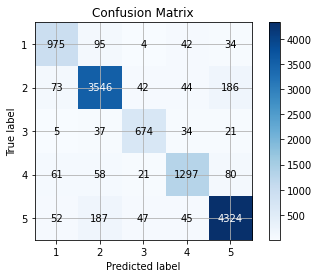

<Figure size 432x288 with 0 Axes>

In [ ]:
y_pred = svclassifier.predict(xtest1)
pickle.dump(svclassifier, open(project_path+'electiommodel', 'wb'))
a=ytest1.shape[0]
b=(ytest1!=y_pred).sum()

print("Accuracy ="+format((a-b)/a*100,'2f')+"%")
print(classification_report(ytest1, y_pred))
plot_cmat(ytest1, y_pred)

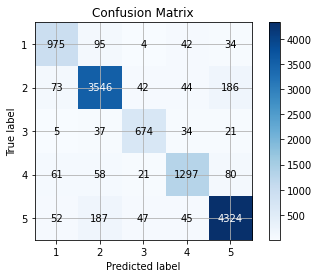

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_cmat(ytest1, y_pred)

Accuracy =96.361816%
              precision    recall  f1-score   support

           1       0.92      0.93      0.92      1150
           2       0.97      0.96      0.96      3891
           3       0.95      0.93      0.94       771
           4       0.95      0.96      0.96      1517
           5       0.97      0.98      0.98      4655

    accuracy                           0.96     11984
   macro avg       0.95      0.95      0.95     11984
weighted avg       0.96      0.96      0.96     11984



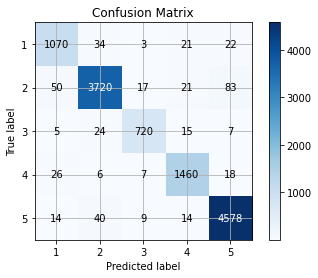

<Figure size 432x288 with 0 Axes>

In [ ]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(xtrain1, ytrain1)
y_pred =rf.predict(xtest1)
a=ytest1.shape[0]
b=(ytest1!=y_pred).sum()
print("Accuracy ="+format((a-b)/a*100,'2f')+"%")
print(classification_report(ytest1, y_pred))
plot_cmat(ytest1, y_pred)

Accuracy =96.361816%
              precision    recall  f1-score   support

           1       0.92      0.93      0.92      1150
           2       0.97      0.96      0.96      3891
           3       0.95      0.94      0.94       771
           4       0.95      0.96      0.96      1517
           5       0.97      0.98      0.98      4655

    accuracy                           0.96     11984
   macro avg       0.95      0.95      0.95     11984
weighted avg       0.96      0.96      0.96     11984



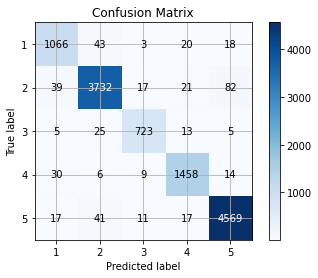

<Figure size 432x288 with 0 Axes>

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(xtrain1, ytrain1)
y_pred =dt.predict(xtest1)
a=ytest1.shape[0]
b=(ytest1!=y_pred).sum()
print("Accuracy ="+format((a-b)/a*100,'2f')+"%")
print(classification_report(ytest1, y_pred))
plot_cmat(ytest1, y_pred)